## Connecting the dataset

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime

In [31]:
df= pd.read_csv('C:/Users/Poghosyan_Syuzanna/Desktop/Syuz/Data/Used_cars_raw.csv') #importing the dataset

In [32]:
df=df.iloc[: , 1:] #drop the first column 
df.replace("NaN", np.nan, inplace=True)
df

,price,area,subarea,name,condition,cylinders,drive,fuel,odometer,paintcolor,size,transmission,type,dealer
0,"$4,990",chicago,chicago city,2007 Toyota Camry Hybrid,good,4 cylinders,fwd,gas,116236.0,grey,NaN,automatic,sedan,1
1,"$10,625",chicago,chicago city,2009 Toyota Camry Hybrid,NaN,4 cylinders,fwd,hybrid,43702.0,grey,NaN,automatic,sedan,1
2,NaN,chicago,chicago city,2010 Toyota Camry,excellent,NaN,fwd,gas,140437.0,white,mid-size,NaN,sedan,1
3,"$14,850",chicago,chicago city,2015 Toyota_ Camry_,excellent,other,NaN,gas,35721.0,NaN,NaN,automatic,sedan,1
4,"$15,630",chicago,chicago city,2016 TOYOTA CAMRY,NaN,NaN,fwd,gas,13152.0,NaN,NaN,automatic,sedan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,"$3,300",los angeles,central LA,2012 Toyota Camry,like new,4 cylinders,fwd,gas,NaN,NaN,NaN,automatic,NaN,0
1091,"$1,100",los angeles,LA westside-southbay,2003 Toyota Camry Xle,NaN,NaN,NaN,gas,NaN,NaN,NaN,automatic,NaN,0
1092,"$3,700",los angeles,San Fernando,2003 toyota camry,NaN,NaN,NaN,gas,132000.0,NaN,NaN,automatic,NaN,0
1093,"$1,502",los angeles,LA san gabriel,2009 toyota camry se,excellent,4 cylinders,fwd,gas,NaN,black,NaN,automatic,NaN,0


## Dataset analysis

In [33]:
df.dtypes

price            object
area             object
subarea          object
name             object
condition        object
cylinders        object
drive            object
fuel             object
odometer        float64
paintcolor       object
size             object
transmission     object
type             object
dealer            int64
dtype: object

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1011 non-null   object 
 1   area          1095 non-null   object 
 2   subarea       1061 non-null   object 
 3   name          1095 non-null   object 
 4   condition     659 non-null    object 
 5   cylinders     721 non-null    object 
 6   drive         605 non-null    object 
 7   fuel          1093 non-null   object 
 8   odometer      764 non-null    float64
 9   paintcolor    630 non-null    object 
 10  size          369 non-null    object 
 11  transmission  1093 non-null   object 
 12  type          640 non-null    object 
 13  dealer        1095 non-null   int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 119.9+ KB


In [35]:
df['production_year'] = df['name'].str[0:5]
df['production_year'] = df['production_year'].astype(int)
df['name'] = df['name'].str[5:]
print(df)


         price         area               subarea                 name  \
0      $4,990       chicago          chicago city  Toyota Camry Hybrid   
1     $10,625       chicago          chicago city  Toyota Camry Hybrid   
2          NaN      chicago          chicago city         Toyota Camry   
3     $14,850       chicago          chicago city       Toyota_ Camry_   
4     $15,630       chicago          chicago city         TOYOTA CAMRY   
...        ...          ...                   ...                  ...   
1090   $3,300   los angeles            central LA         Toyota Camry   
1091   $1,100   los angeles  LA westside-southbay     Toyota Camry Xle   
1092   $3,700   los angeles          San Fernando         toyota camry   
1093   $1,502   los angeles        LA san gabriel      toyota camry se   
1094   $3,700   los angeles          San Fernando         toyota camry   

      condition    cylinders drive    fuel  odometer paintcolor      size  \
0          good  4 cylinders   fwd

In [36]:
columns_to_convert = ['area', 'subarea']

for col in columns_to_convert:
    df[col] = df[col].str.title() 

In [37]:
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float) 
print(df)  

        price         area               subarea                 name  \
0      4990.0      Chicago          Chicago City  Toyota Camry Hybrid   
1     10625.0      Chicago          Chicago City  Toyota Camry Hybrid   
2         NaN      Chicago          Chicago City         Toyota Camry   
3     14850.0      Chicago          Chicago City       Toyota_ Camry_   
4     15630.0      Chicago          Chicago City         TOYOTA CAMRY   
...       ...          ...                   ...                  ...   
1090   3300.0  Los Angeles            Central La         Toyota Camry   
1091   1100.0  Los Angeles  La Westside-Southbay     Toyota Camry Xle   
1092   3700.0  Los Angeles          San Fernando         toyota camry   
1093   1502.0  Los Angeles        La San Gabriel      toyota camry se   
1094   3700.0  Los Angeles          San Fernando         toyota camry   

      condition    cylinders drive    fuel  odometer paintcolor      size  \
0          good  4 cylinders   fwd     gas  11

In [38]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1011 non-null   float64
 1   area             1095 non-null   object 
 2   subarea          1061 non-null   object 
 3   name             1095 non-null   object 
 4   condition        659 non-null    object 
 5   cylinders        721 non-null    object 
 6   drive            605 non-null    object 
 7   fuel             1093 non-null   object 
 8   odometer         764 non-null    float64
 9   paintcolor       630 non-null    object 
 10  size             369 non-null    object 
 11  transmission     1093 non-null   object 
 12  type             640 non-null    object 
 13  dealer           1095 non-null   int64  
 14  production_year  1095 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(11)
memory usage: 124.2+ KB


In [39]:
df = df.drop(['size', 'drive', 'subarea', 'condition', 'cylinders'], axis=1)

In [40]:
df=df.dropna()
df

,price,area,name,fuel,odometer,paintcolor,transmission,type,dealer,production_year
0,4990.0,Chicago,Toyota Camry Hybrid,gas,116236.0,grey,automatic,sedan,1,2007
1,10625.0,Chicago,Toyota Camry Hybrid,hybrid,43702.0,grey,automatic,sedan,1,2009
5,850.0,Chicago,toyota camry,gas,187000.0,red,automatic,sedan,0,1993
10,2295.0,Chicago,toyota camry le,gas,107000.0,white,automatic,sedan,0,2000
16,4200.0,Chicago,toyota camry LE,gas,120451.0,grey,automatic,sedan,0,2005
...,...,...,...,...,...,...,...,...,...,...
1082,17000.0,Los Angeles,toyota camry,gas,20000.0,black,automatic,sedan,0,2017
1083,7800.0,Los Angeles,toyota camry le,gas,120000.0,white,automatic,sedan,0,2010
1085,11995.0,Los Angeles,TOYOTA CAMRY SE SPORT,gas,103674.0,white,automatic,sedan,1,2014
1086,1500.0,Los Angeles,Toyota Camry,gas,168000.0,grey,automatic,sedan,0,1992


## Chicago's used cars (loops, dictionary, sets, lists)

Let's check how many used cars are there in Chicago, based on the fuel type.

### Lists:

In [41]:
df2=df[df['area']=='Chicago'] 
fuel_type=list(df2['fuel'])
fuel_type

['gas',
 'hybrid',
 'gas',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'hybrid',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'other',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'hybrid',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'gas',
 'hybrid',

### Sets:

In [42]:
fuel_set= set(df2["fuel"])
fuel_set

{'gas', 'hybrid', 'other'}

### Dictionaries:

In [43]:
fuel_dict = {key: None for key in fuel_set}
fuel_dict

{'gas': None, 'hybrid': None, 'other': None}

### Loop to get the number of used cars in each fuel type in Chicago:

In [44]:
for i in fuel_dict:
    count = 0
    for j in fuel_type:
        if j == i:
            count+=1
    fuel_dict[i]=count 
fuel_dict

{'gas': 282, 'hybrid': 19, 'other': 4}

## Summary statistic table

In [45]:
round(df.describe(),2)

,price,odometer,dealer,production_year
count,424.00,424.00,424.00,424.00
mean,6987.59,104269.65,0.43,2007.06
std,4580.65,62911.60,0.50,5.83
min,361.00,0.00,0.00,1992.00
25%,3200.00,52482.00,0.00,2002.75
50%,6150.00,114512.00,0.00,2007.00
75%,9977.00,148138.75,1.00,2012.00
max,18500.00,350000.00,1.00,2017.00


## Graph

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

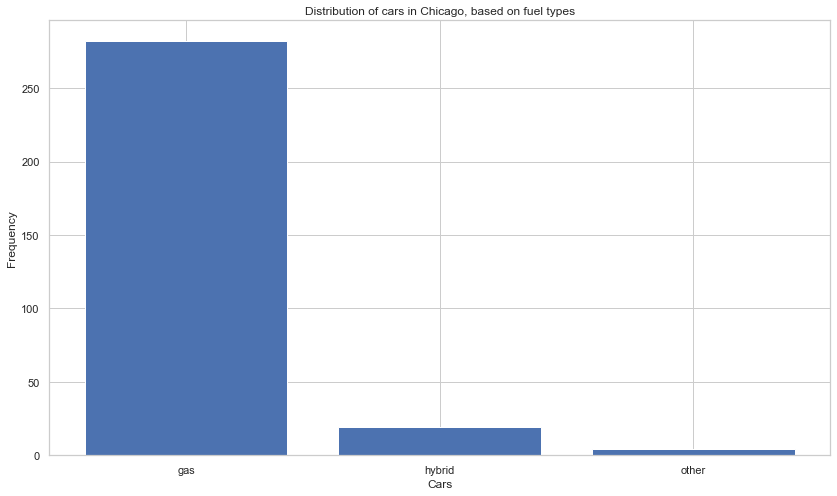

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
keys = list(fuel_dict.keys())   
values = list(fuel_dict.values()) 
plt.bar(keys, values)
plt.title("Distribution of cars in Chicago, based on fuel types")
plt.xlabel("Cars")
plt.ylabel("Frequency")

plt.show()

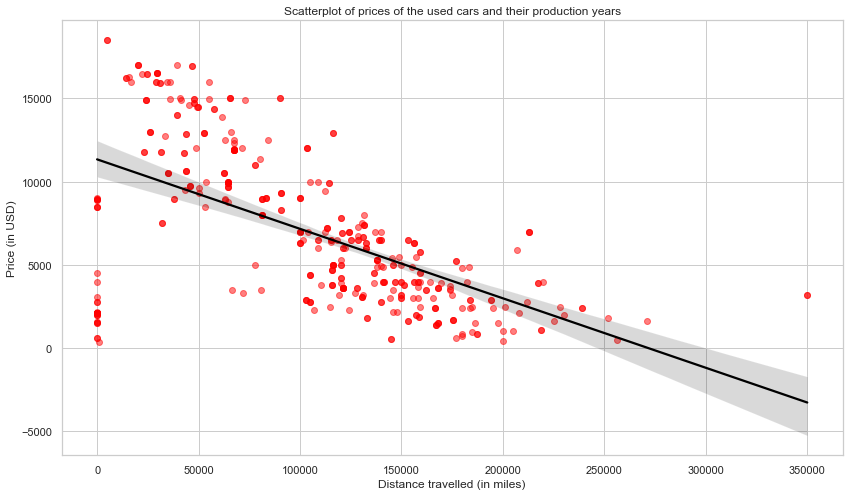

In [48]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.regplot(x='odometer', y='price', data=df, color='red', scatter_kws={'alpha':0.5}, line_kws={"color": "black"})

plt.title("Scatterplot of prices of the used cars and their production years")
plt.xlabel("Distance travelled (in miles)")
plt.ylabel("Price (in USD)")

# plot the graph
plt.show()

In [49]:
df.to_excel('Used_cars_clean.xlsx')